# Post-Processing Statistical Models in Chapter 7

This notebook processes the brms/stan output and creates the figures used in this chapter. Generally, everything is pretty similar to the previous results. However, the estimation did change a little bit. The quadratic specification made some of my code break. I ended up changing things to a multilevel model. Throughout the analysis:

* I estimated a latent variable of authoritarianism. It doesn't matter, but for consistency with Stanley's latent variable analysis, it seemed wise.
* Multinomial logit models.

In [233]:
### Load dependencies, data, themes, configurations
rm(list = ls())
#require(c("tidyverse", "tidybayes", "broom", "lavaan", "cowplot", "readstata13", "foreign", "car", "modelr"))
### useful functinon to 0-1 recode
zero.one<-function(x){
  min.x<-min(x, na.rm=T)
  max.x<-max(x-min.x, na.rm=T)
  return((x-min.x)/max.x)
}

library(brms)
library(ggplot2)
library(modelr)
library(tidybayes)
library(dplyr)
library(cowplot)
library(haven)
library(forcats)
## Some helper functions, and configurations.
load("/Users/chrisweber/Desktop/Authoritarianism_V2/Authoritarianism_V2/clean_data/panel.auth.rda")  ### Just work from this data; everything should be here, recoded.
## models
load("/Users/chrisweber/Desktop/Authoritarianism_V2/Authoritarianism_V2/Chapters/Chapters/Chapter7/chapter7_voting.rda")
dat2000 = tmp_data[[4]] 
dat2012 = tmp_data[[5]] 
dat2016 = tmp_data[[6]] 

In [234]:
ggtheme = theme(
        plot.title=element_text(face="bold",hjust=0,vjust=0,colour="#3C3C3C",size=20),
        axis.text.x=element_text(size=16,colour="#535353",face="bold"),
        axis.text.y=element_text(size=16,colour="#535353",face="bold"),
        axis.title = element_text(size=16,colour="#535353",face="bold"),
        axis.title.y=element_text(size=16,colour="#535353",face="bold",vjust=1.5),
        axis.ticks=element_blank(),
        strip.text.x = element_text(size = 16),
        panel.grid.major=element_line(colour="#D0D0D0",size=.25),
        panel.background=element_rect(fill="white"),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16)) 
## Voting transitions
table(dat2000$vote1, dat2000$vote2) %>% prop.table(1)
table(dat2012$vote1, dat2012$vote2) %>% prop.table(1)
table(dat2016$vote1, dat2016$vote2) %>% prop.table(1)

## Voting transitions
table(dat2000$pid3.1, dat2000$pid3.2) %>% prop.table(1)
table(dat2012$pid3.1, dat2012$pid3.2) %>% prop.table(1)
table(dat2016$pid3.1, dat2016$pid3.2) %>% prop.table(1)

   
            0         1
  0 0.8636364 0.1363636
  1 0.0609319 0.9390681

   
             0          1
  0 0.91259436 0.08740564
  1 0.04540461 0.95459539

   
             0          1
  0 0.95734597 0.04265403
  1 0.06611570 0.93388430

   
             1          2          3
  1 0.89268293 0.08292683 0.02439024
  2 0.14615385 0.60769231 0.24615385
  3 0.01276596 0.14042553 0.84680851

   
             1          2          3
  1 0.87362637 0.08741259 0.03896104
  2 0.11269488 0.77371938 0.11358575
  3 0.01608849 0.12217195 0.86173957

   
             1          2          3
  1 0.80131363 0.12972085 0.06896552
  2 0.12873862 0.63459038 0.23667100
  3 0.04178273 0.13649025 0.82172702

In [235]:
paste("The probability of voting for Bush in 2004", "", "at high and low levels of authoritarianism  and 2000 vote choice:")
#############################################################################################################################
zap_labels(dat2000) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(sex.2000 = mean(sex.2000, na.rm = T), age.2000 = mean(age.2000, na.rm = T), 
                       college.2000 = mean(college.2000, na.rm = T), income.2000 = mean(income.2000, na.rm = T), 
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       vote1 = seq_range(vote1, n = 2)) %>% 
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_linpred_draws(dat[[1]]) %>% 
                       mutate(Vote_Republican = plogis(.linpred)) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                       mutate(Voter = ifelse(vote1 == 1,  "Bush(2000)", "Gore(2000)")) %>% 
                       group_by(Voter, Authoritarianism) %>% 
                      summarize(mean = quantile(Vote_Republican, prob =  0.5),
                                min  = quantile(Vote_Republican, prob = 0.025),
                                max  = quantile(Vote_Republican, prob = 0.975))

[1] "The probability of voting for Bush in 2004  at high and low levels of authoritarianism  and 2000 vote choice:"

`summarise()` has grouped output by 'Voter'. You can override using the
`.groups` argument.


Voter,Authoritarianism,mean,min,max
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Bush(2000),Authoritarian,0.94273274,0.841227522,0.98793013
Bush(2000),Non-Authoritarian,0.91241619,0.813706295,0.96844363
Gore(2000),Authoritarian,0.26020572,0.077288670,0.53257601
Gore(2000),Non-Authoritarian,0.01815298,0.003178029,0.06222356


I'm happy to manually put this information in word -- a 2x2 transition matrix. However, I played around with the presentation below.  

`summarise()` has grouped output by 'Voter'. You can override using the
`.groups` argument.


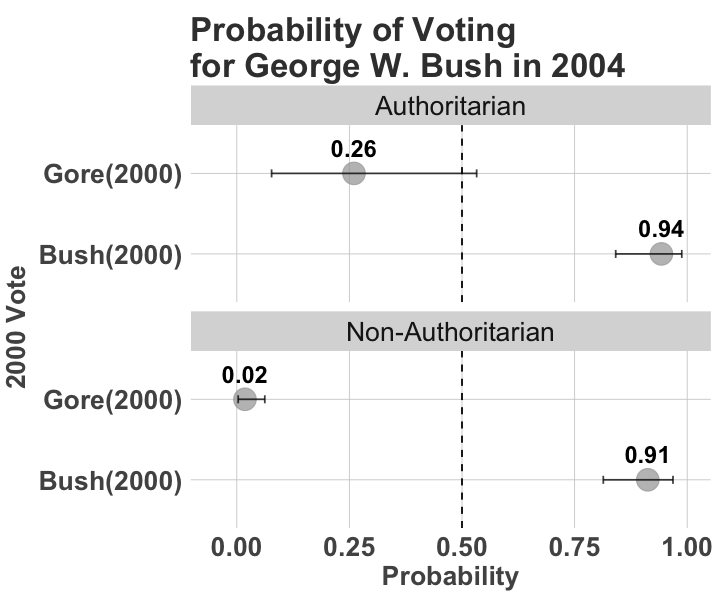

In [241]:
options(repr.plot.width=6, repr.plot.height=5)
zap_labels(dat2000) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(sex.2000 = mean(sex.2000, na.rm = T), age.2000 = mean(age.2000, na.rm = T), 
                       college.2000 = mean(college.2000, na.rm = T), income.2000 = mean(income.2000, na.rm = T), 
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       vote1 = seq_range(vote1, n = 2)) %>% 
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_linpred_draws(dat[[1]]) %>% 
                       mutate(Vote_Republican = plogis(.linpred)) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                       mutate(Voter = ifelse(vote1 == 1,  "Bush(2000)", "Gore(2000)")) %>% 
                       group_by(Voter, Authoritarianism) %>% 
                      summarize(mean = quantile(Vote_Republican, prob =  0.5),
                                min  = quantile(Vote_Republican, prob = 0.025),
                                max  = quantile(Vote_Republican, prob = 0.975)) %>%
ggplot(
              aes(x = as.factor(Voter), 
                  y = mean, ymin=max, 
                  ymax=min, label = round(mean,2)))+
  facet_wrap(~as.factor(Authoritarianism), nrow = 2) +
  geom_point(size=6, colour = "darkgrey", alpha = 0.75) +
  geom_errorbar(width = 0.10, alpha=0.75, colour = "black") +
  ggtitle("Probability of Voting \nfor George W. Bush in 2004") +
  ggtheme + 
  scale_y_continuous("Probability", limits=c(-0.05,1))+
  scale_x_discrete("2000 Vote") + 
  geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed") + 
  geom_text(aes(fontface = 2), vjust = -1, size = 5)+
  coord_flip()

# 2012-2016

In [237]:
paste("The probability of voting for Trump in 2016", "", "at high and low levels of authoritarianism  and 2012 vote choice:")
#############################################################################################################################
zap_labels(dat2012) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(sex.2012 = mean(sex.2012, na.rm = T), age.2012 = mean(age.2012, na.rm = T), 
                       college.2012 = mean(college.2012, na.rm = T), income.2012 = mean(income.2012, na.rm = T), 
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       vote1 = seq_range(vote1, n = 2)) %>% 
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_linpred_draws(dat[[2]]) %>% 
                       mutate(Vote_Republican = plogis(.linpred)) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                       mutate(Voter = ifelse(vote1 == 1,  "Romney(2012)", "Obama(2012)")) %>% 
                       group_by(Voter, Authoritarianism) %>% 
                      summarize(mean = quantile(Vote_Republican, prob =  0.5),
                                min  = quantile(Vote_Republican, prob = 0.025),
                                max  = quantile(Vote_Republican, prob = 0.975))

[1] "The probability of voting for Trump in 2016  at high and low levels of authoritarianism  and 2012 vote choice:"

`summarise()` has grouped output by 'Voter'. You can override using the
`.groups` argument.


Voter,Authoritarianism,mean,min,max
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Obama(2012),Authoritarian,0.21856590,0.16042917,0.28286811
Obama(2012),Non-Authoritarian,0.02135029,0.01339597,0.03315442
Romney(2012),Authoritarian,0.96748148,0.94800889,0.98066495
Romney(2012),Non-Authoritarian,0.88595961,0.83280916,0.92523567


`summarise()` has grouped output by 'Voter'. You can override using the
`.groups` argument.


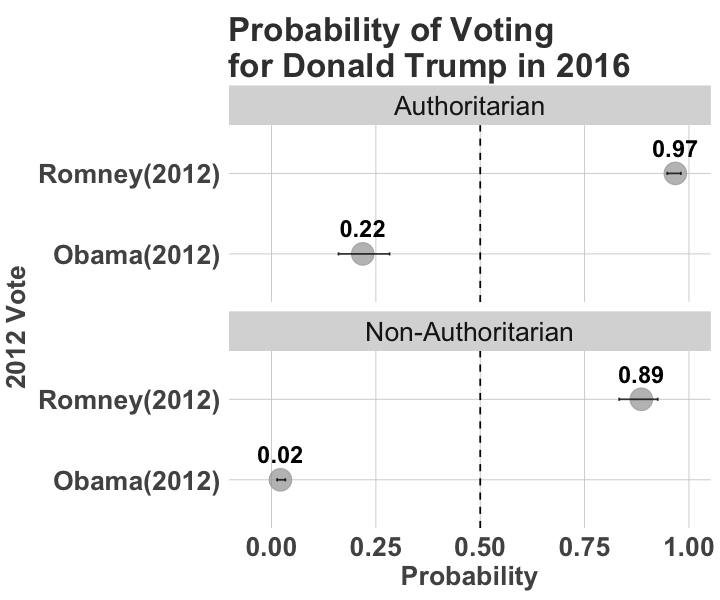

In [240]:
options(repr.plot.width=6, repr.plot.height=5)
#############################################################################################################################
zap_labels(dat2012) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(sex.2012 = mean(sex.2012, na.rm = T), age.2012 = mean(age.2012, na.rm = T), 
                       college.2012 = mean(college.2012, na.rm = T), income.2012 = mean(income.2012, na.rm = T), 
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       vote1 = seq_range(vote1, n = 2)) %>% 
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_linpred_draws(dat[[2]]) %>% 
                       mutate(Vote_Republican = plogis(.linpred)) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                       mutate(Voter = ifelse(vote1 == 1,  "Romney(2012)", "Obama(2012)")) %>% 
                       group_by(Voter, Authoritarianism) %>% 
                      summarize(mean = quantile(Vote_Republican, prob =  0.5),
                                min  = quantile(Vote_Republican, prob = 0.025),
                                max  = quantile(Vote_Republican, prob = 0.975))%>%
ggplot(
              aes(x = as.factor(Voter), 
                  y = mean, ymin=max, 
                  ymax=min, label = round(mean,2)))+
  facet_wrap(~as.factor(Authoritarianism), nrow = 2) +
  geom_point(size=6, colour = "darkgrey", alpha = 0.75) +
  geom_errorbar(width = 0.04, alpha=0.75, colour = "black") +
  ggtitle("Probability of Voting \nfor Donald Trump in 2016") +
  ggtheme + 
  scale_y_continuous("Probability", limits=c(-0.05,1))+
  scale_x_discrete("2012 Vote") + 
  geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed") + 
  geom_text(aes(fontface = 2), vjust = -1, size = 5)+
  coord_flip()

In [175]:
options(repr.plot.width=6, repr.plot.height=8)
#############################################################################################################################
zap_labels(dat2016) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(female.2016 = mean(female.2016, na.rm = T), age.2016 = mean(age.2016, na.rm = T), 
                       college.2016 = mean(college.2016, na.rm = T), income.2016 = mean(income.2016, na.rm = T), 
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       vote1 = seq_range(vote1, n = 2)) %>% 
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_linpred_draws(dat[[3]]) %>% 
                       mutate(Vote_Republican = plogis(.linpred)) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                       mutate(Voter = ifelse(vote1 == 1,  "Trump(2016)", "Clinton(2016)")) %>% 
                       group_by(Voter, Authoritarianism) %>% 
                      summarize(mean = quantile(Vote_Republican, prob =  0.5),
                                min  = quantile(Vote_Republican, prob = 0.025),
                                max  = quantile(Vote_Republican, prob = 0.975))

`summarise()` has grouped output by 'Voter'. You can override using the
`.groups` argument.


Voter,Authoritarianism,mean,min,max
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Clinton(2016),Authoritarian,0.07189569,0.021406586,0.17500338
Clinton(2016),Non-Authoritarian,0.01363861,0.004690638,0.03429581
Trump(2016),Authoritarian,0.96501691,0.927247254,0.98578196
Trump(2016),Non-Authoritarian,0.91790380,0.818437103,0.96859650


`summarise()` has grouped output by 'Voter'. You can override using the
`.groups` argument.


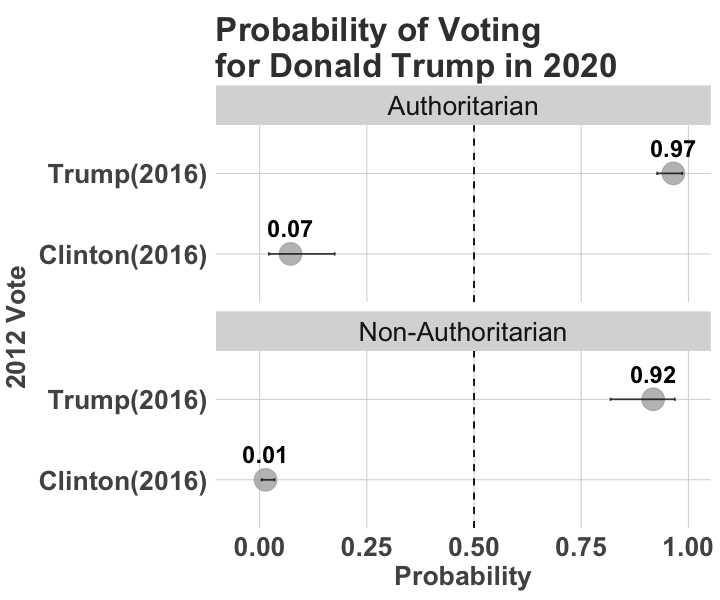

In [242]:
options(repr.plot.width=6, repr.plot.height=5)
#############################################################################################################################
zap_labels(dat2016) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(female.2016 = mean(female.2016, na.rm = T), age.2016 = mean(age.2016, na.rm = T), 
                       college.2016 = mean(college.2016, na.rm = T), income.2016 = mean(income.2016, na.rm = T), 
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       vote1 = seq_range(vote1, n = 2)) %>% 
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_linpred_draws(dat[[3]]) %>% 
                       mutate(Vote_Republican = plogis(.linpred)) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                       mutate(Voter = ifelse(vote1 == 1,  "Trump(2016)", "Clinton(2016)")) %>% 
                       group_by(Voter, Authoritarianism) %>% 
                      summarize(mean = quantile(Vote_Republican, prob =  0.5),
                                min  = quantile(Vote_Republican, prob = 0.025),
                                max  = quantile(Vote_Republican, prob = 0.975)) %>% 
        ggplot(
              aes(x = as.factor(Voter), 
                  y = mean, ymin=max, 
                  ymax=min, label = round(mean,2)))+
  facet_wrap(~as.factor(Authoritarianism), nrow = 2) +
  geom_point(size=6, colour = "darkgrey", alpha = 0.75) +
  geom_errorbar(width = 0.04, alpha=0.75, colour = "black") +
  ggtitle("Probability of Voting \nfor Donald Trump in 2020") +
  ggtheme + 
  scale_y_continuous("Probability", limits=c(-0.05,1))+
  scale_x_discrete("2012 Vote") + 
  geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed") + 
  geom_text(aes(fontface = 2), vjust = -1, size = 5)+
  coord_flip()

# Education Effects

In [188]:
dat[[4]] %>% as.formula()
dat[[5]] %>% as.formula()
dat[[6]] %>% as.formula()

vote2 ~ sex.2000 + age.2000 + college.2000 + income.2000 + authoritarianism + authoritarianism_2 + vote1 + authoritarianism:vote1 + authoritarianism_2:vote1 + authoritarianism:college.2000 + authoritarianism_2:college.2000 + college.2000:vote1 + authoritarianism:college.2000:vote1 

vote2 ~ sex.2012 + age.2012 + college.2012 + income.2012 + authoritarianism + authoritarianism_2 + vote1 + authoritarianism:vote1 + authoritarianism_2:vote1 + authoritarianism:college.2012 + authoritarianism_2:college.2012 + college.2012:vote1 + authoritarianism:college.2012:vote1 

vote2 ~ female.2016 + age.2016 + college.2016 + income.2016 + authoritarianism + authoritarianism_2 + vote1 + authoritarianism:vote1 + authoritarianism_2:vote1 + authoritarianism:college.2016 + authoritarianism_2:college.2016 + college.2016:vote1 + authoritarianism:college.2016:vote1 

`summarise()` has grouped output by 'Voter', 'Authoritarianism'. You can
override using the `.groups` argument.


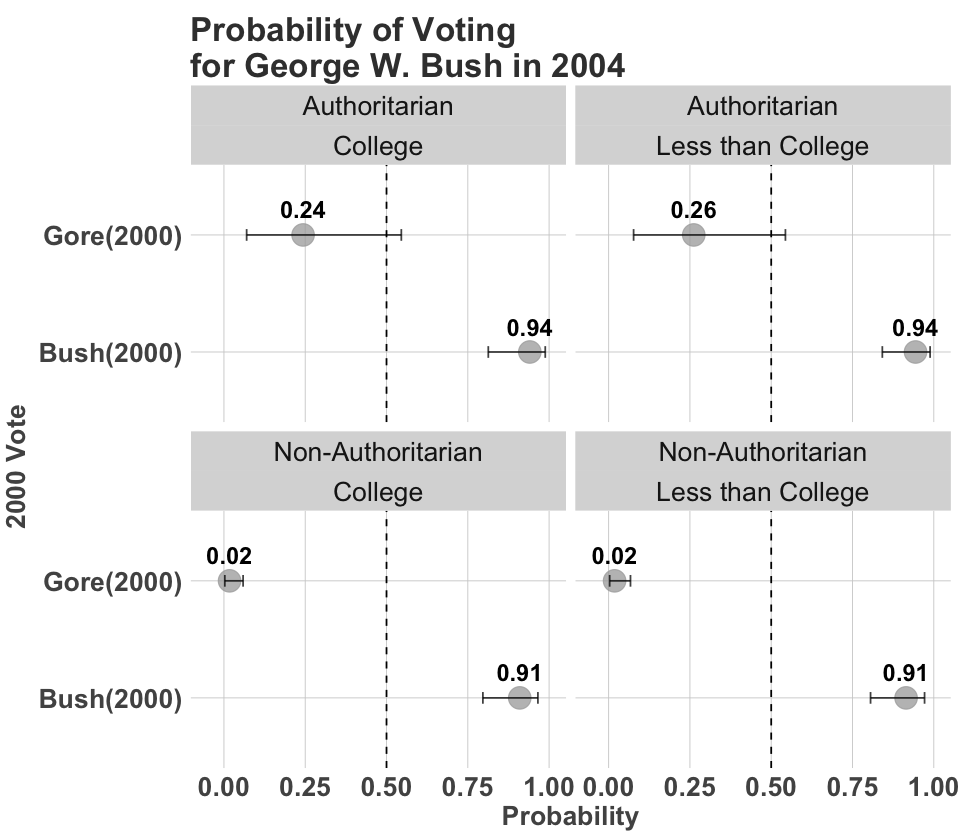

In [243]:
options(repr.plot.width=8, repr.plot.height=7)
zap_labels(dat2000) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(sex.2000 = mean(sex.2000, na.rm = T), age.2000 = mean(age.2000, na.rm = T), 
                       college.2000 = c(0, 1), 
                       income.2000 = mean(income.2000, na.rm = T), 
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       vote1 = seq_range(vote1, n = 2)) %>% 
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_linpred_draws(dat[[1]]) %>% 
                       mutate(Vote_Republican = plogis(.linpred)) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                       mutate(Voter = ifelse(vote1 == 1,  "Bush(2000)", "Gore(2000)")) %>% 
                       mutate(Education = ifelse(college.2000 == 1,  "College", "Less than College")) %>% 
                       group_by(Voter, Authoritarianism, Education) %>% 
                      summarize(mean = quantile(Vote_Republican, prob =  0.5),
                                min  = quantile(Vote_Republican, prob = 0.025),
                                max  = quantile(Vote_Republican, prob = 0.975)) %>%
ggplot(
              aes(x = as.factor(Voter), 
                  y = mean, ymin=max, 
                  ymax=min, label = round(mean,2)))+
  facet_wrap(~as.factor(Authoritarianism) + Education, nrow = 2) +
  geom_point(size=6, colour = "darkgrey", alpha = 0.75) +
  geom_errorbar(width = 0.10, alpha=0.75, colour = "black") +
  ggtitle("Probability of Voting \nfor George W. Bush in 2004") +
  ggtheme + 
  scale_y_continuous("Probability", limits=c(-0.05,1))+
  scale_x_discrete("2000 Vote") + 
  geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed") + 
  geom_text(aes(fontface = 2), vjust = -1, size = 5)+
  coord_flip()

`summarise()` has grouped output by 'Voter', 'Authoritarianism'. You can
override using the `.groups` argument.


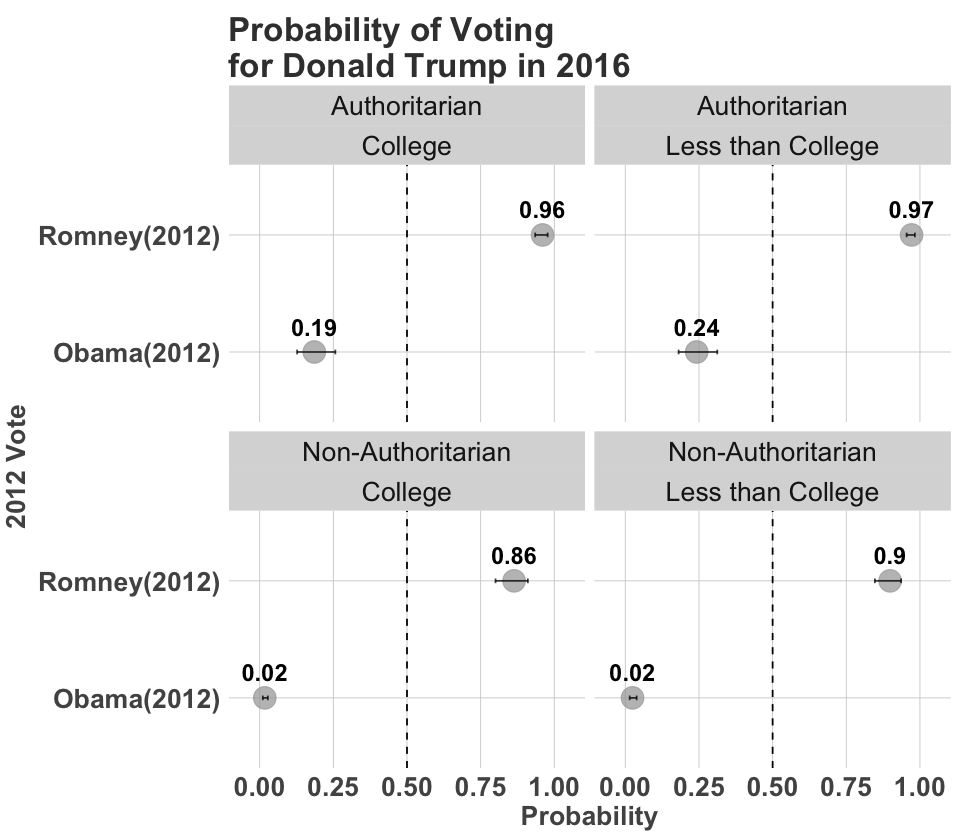

In [244]:
options(repr.plot.width=8, repr.plot.height=7)
#############################################################################################################################
zap_labels(dat2012) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(sex.2012 = mean(sex.2012, na.rm = T), age.2012 = mean(age.2012, na.rm = T), 
                       college.2012 = c(0,1), 
                       income.2012 = mean(income.2012, na.rm = T), 
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       vote1 = seq_range(vote1, n = 2)) %>% 
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_linpred_draws(dat[[2]]) %>% 
                       mutate(Vote_Republican = plogis(.linpred)) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                       mutate(Voter = ifelse(vote1 == 1,  "Romney(2012)", "Obama(2012)")) %>% 
                      mutate(Education = ifelse(college.2012 == 1,  "College", "Less than College")) %>% 
                       group_by(Voter, Authoritarianism, Education) %>% 
                      summarize(mean = quantile(Vote_Republican, prob =  0.5),
                                min  = quantile(Vote_Republican, prob = 0.025),
                                max  = quantile(Vote_Republican, prob = 0.975))%>%
ggplot(
              aes(x = as.factor(Voter), 
                  y = mean, ymin=max, 
                  ymax=min, label = round(mean,2)))+
  facet_wrap(~as.factor(Authoritarianism) + Education, nrow = 2) +
  geom_point(size=6, colour = "darkgrey", alpha = 0.75) +
  geom_errorbar(width = 0.04, alpha=0.75, colour = "black") +
  ggtitle("Probability of Voting \nfor Donald Trump in 2016") +
  ggtheme + 
  scale_y_continuous("Probability", limits=c(-0.05,1.05))+
  scale_x_discrete("2012 Vote") + 
  geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed") + 
  geom_text(aes(fontface = 2), vjust = -1, size = 5)+
  coord_flip()

`summarise()` has grouped output by 'Voter', 'Authoritarianism'. You can
override using the `.groups` argument.


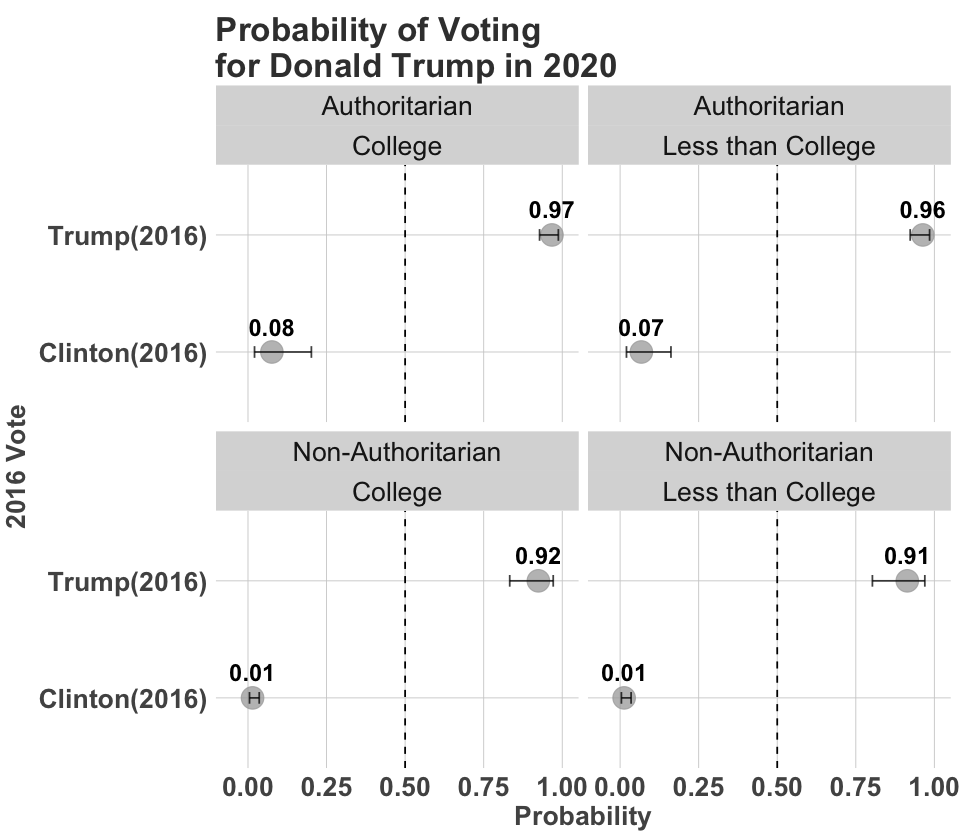

In [246]:
options(repr.plot.width=8, repr.plot.height=7)
#############################################################################################################################
zap_labels(dat2016) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(female.2016 = mean(female.2016, na.rm = T), age.2016 = mean(age.2016, na.rm = T), 
                       college.2016 = c(0,1), income.2016 = mean(income.2016, na.rm = T), 
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       vote1 = seq_range(vote1, n = 2)) %>% 
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_linpred_draws(dat[[3]]) %>% 
                       mutate(Vote_Republican = plogis(.linpred)) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                       mutate(Education = ifelse(college.2016 == 1,  "College", "Less than College")) %>% 
                       mutate(Voter = ifelse(vote1 == 1,  "Trump(2016)", "Clinton(2016)")) %>% 
                       group_by(Voter, Authoritarianism, Education) %>% 
                      summarize(mean = quantile(Vote_Republican, prob =  0.5),
                                min  = quantile(Vote_Republican, prob = 0.025),
                                max  = quantile(Vote_Republican, prob = 0.975)) %>% 
ggplot(
              aes(x = as.factor(Voter), 
                  y = mean, ymin=max, 
                  ymax=min, label = round(mean,2)))+
  facet_wrap(~as.factor(Authoritarianism) + Education, nrow = 2) +
  geom_point(size=6, colour = "darkgrey", alpha = 0.75) +
  geom_errorbar(width = 0.10, alpha=0.75, colour = "black") +
  ggtitle("Probability of Voting \nfor Donald Trump in 2020") +
  ggtheme + 
  scale_y_continuous("Probability", limits=c(-0.05,1))+
  scale_x_discrete("2016 Vote") + 
  geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed") + 
  geom_text(aes(fontface = 2), vjust = -1, size = 5)+
  coord_flip()

# Party Identification

In [247]:
load("/Users/chrisweber/Desktop/Authoritarianism_V2/Authoritarianism_V2/Chapters/Chapters/Chapter7/chapter7_pid.rda")

In [228]:
dat[[1]]%>% as.formula
dat[[2]]%>% as.formula
dat[[3]]%>% as.formula

pid3.2 ~ sex.2000 + age.2000 + college.2000 + income.2000 + authoritarianism + authoritarianism_2 + republican + independent + authoritarianism:republican + authoritarianism_2:republican + authoritarianism:independent + authoritarianism_2:independent 

pid3.2 ~ sex.2012 + sex.2012 + college.2012 + income.2012 + authoritarianism + authoritarianism_2 + republican + independent + authoritarianism:republican + authoritarianism_2:republican + authoritarianism:independent + authoritarianism_2:independent 

pid3.2 ~ female.2016 + age.2016 + college.2016 + income.2016 + authoritarianism + authoritarianism_2 + republican + independent + authoritarianism:republican + authoritarianism_2:republican + authoritarianism:independent + authoritarianism_2:independent 

`summarise()` has grouped output by 'outcome', 'Authoritarianism'. You can
override using the `.groups` argument.


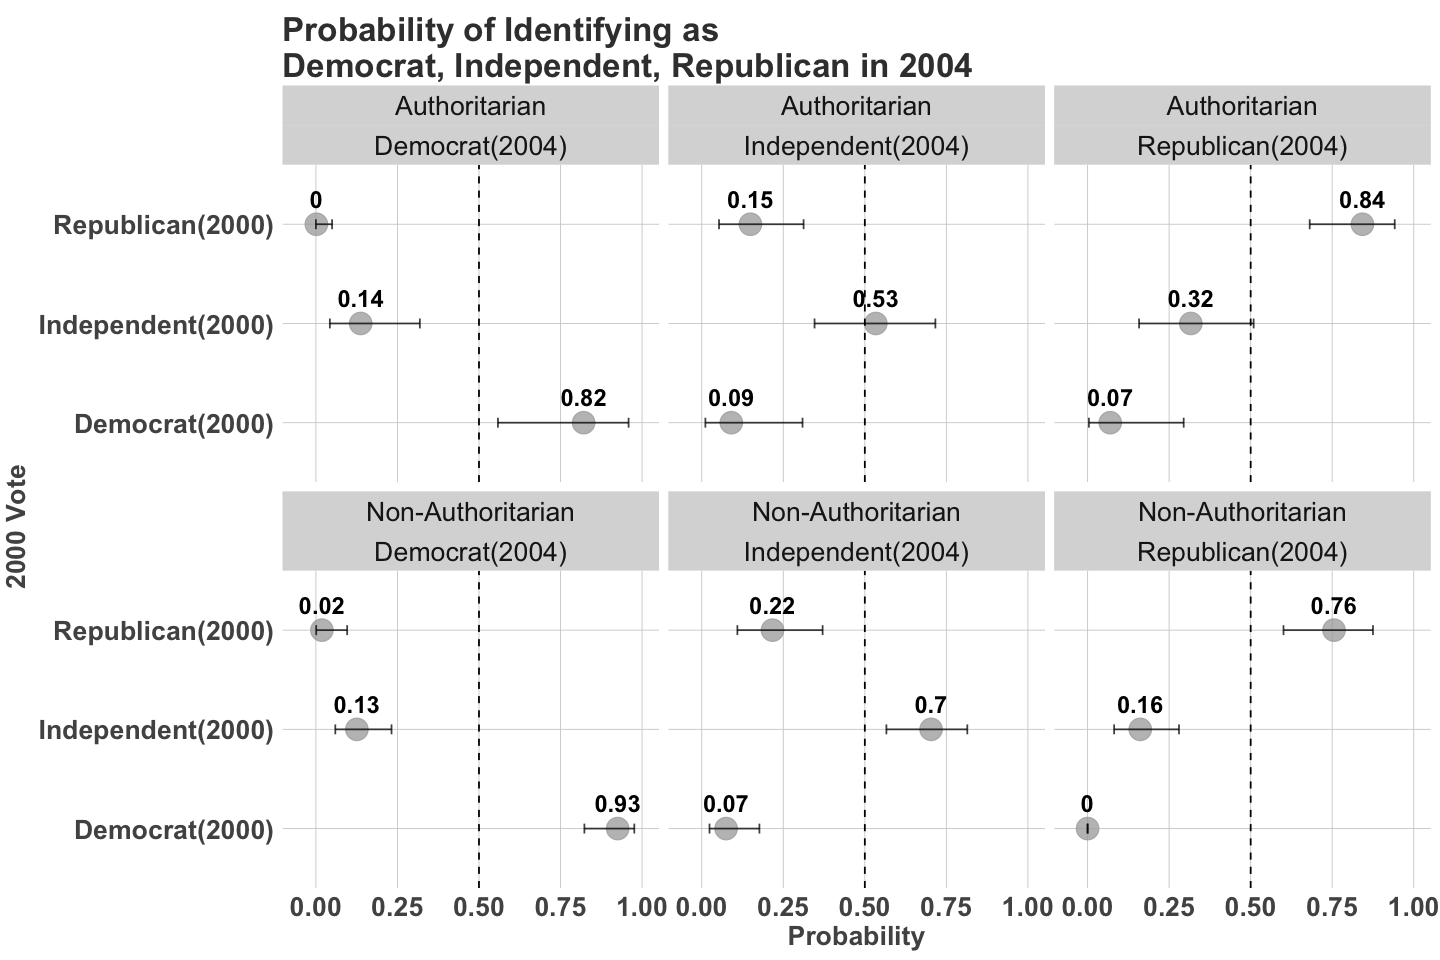

In [248]:
options(repr.plot.width=12, repr.plot.height=8)
zap_labels(dat2000) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(sex.2000 = mean(sex.2000, na.rm = T), 
            age.2000 = mean(age.2000, na.rm = T), 
            college.2000 = mean(college.2000, na.rm = T), 
            income.2000 = mean(income.2000, na.rm = T), 
            authoritarianism = seq_range(authoritarianism, n = 2),
            republican = c(0,1),
            independent =c(0,1)) %>% 
                                  filter(!(republican ==1 & independent ==1)) %>% 

                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_epred_draws(dat[[1]]) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                       mutate(outcome = recode(.category, `1` = "Democrat(2004)", `2` = "Independent(2004)", `3` = "Republican(2004)")) %>%
                       mutate(Partisanship = ifelse(republican == 0 & independent ==0, "Democrat(2000)", 
                                                ifelse(republican ==1 & independent ==0, "Republican(2000)",
                                                    "Independent(2000)")))  %>%
                       group_by(outcome, Authoritarianism, Partisanship) %>% 
                      summarize(mean = quantile(.epred, prob =  0.5),
                                min  = quantile(.epred, prob = 0.025),
                                max  = quantile(.epred, prob = 0.975)) %>% 
 ggplot(aes(x = as.factor(Partisanship), 
                  y = mean, ymin=max, 
                  ymax=min, label = round(mean,2)))+
  facet_wrap(~as.factor(Authoritarianism) + outcome, ncol = 3) +
  geom_point(size=6, colour = "darkgrey", alpha = 0.75) +
  geom_errorbar(width = 0.10, alpha=0.75, colour = "black") +
  ggtitle("Probability of Identifying as \nDemocrat, Independent, Republican in 2004") +
  ggtheme + 
  scale_y_continuous("Probability", limits=c(-0.05,1))+
  scale_x_discrete("2000 Vote") + 
  geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed") + 
  geom_text(aes(fontface = 2), vjust = -1, size = 5)+
  coord_flip()

In [249]:
options(repr.plot.width=8, repr.plot.height=8)
#############################################################################################################################
zap_labels(dat2012) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(sex.2012 = mean(sex.2012, na.rm = T), age.2012 = mean(age.2012, na.rm = T), 
                       college.2012 = c(0,1), 
                       income.2012 = mean(income.2012, na.rm = T), 
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       republican = c(0,1),
                       independent =c(0,1)) %>% 
                       filter(!(republican ==1 & independent ==1)) %>% 
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_epred_draws(dat[[2]]) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                       mutate(outcome = recode(.category, `1` = "Democrat(2016)", `2` = "Independent(2016)", `3` = "Republican(2016)")) %>%
                       mutate(Partisanship = ifelse(republican == 0 & independent ==0, "Democrat(2012)", 
                                                ifelse(republican ==1 & independent ==0, "Republican(2012)",
                                                    "Independent(2012)")))  %>%
                       group_by(outcome, Authoritarianism, Partisanship) %>% 
                      summarize(mean = quantile(.epred, prob =  0.5),
                                min  = quantile(.epred, prob = 0.025),
                                max  = quantile(.epred, prob = 0.975)) 

`summarise()` has grouped output by 'outcome', 'Authoritarianism'. You can
override using the `.groups` argument.


outcome,Authoritarianism,Partisanship,mean,min,max
<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Democrat(2016),Authoritarian,Democrat(2012),0.823513297,0.755423471,0.88416542
Democrat(2016),Authoritarian,Independent(2012),0.052944072,0.028880527,0.09038869
Democrat(2016),Authoritarian,Republican(2012),0.010755980,0.003025619,0.02835875
Democrat(2016),Non-Authoritarian,Democrat(2012),0.927937493,0.896059666,0.95039273
Democrat(2016),Non-Authoritarian,Independent(2012),0.207431618,0.156541561,0.25990661
Democrat(2016),Non-Authoritarian,Republican(2012),0.036098863,0.013170613,0.08016778
Independent(2016),Authoritarian,Democrat(2012),0.096050689,0.059423525,0.14276324
Independent(2016),Authoritarian,Independent(2012),0.781349916,0.721325628,0.83555119
Independent(2016),Authoritarian,Republican(2012),0.088040775,0.059298498,0.12851268


`summarise()` has grouped output by 'outcome', 'Authoritarianism'. You can
override using the `.groups` argument.


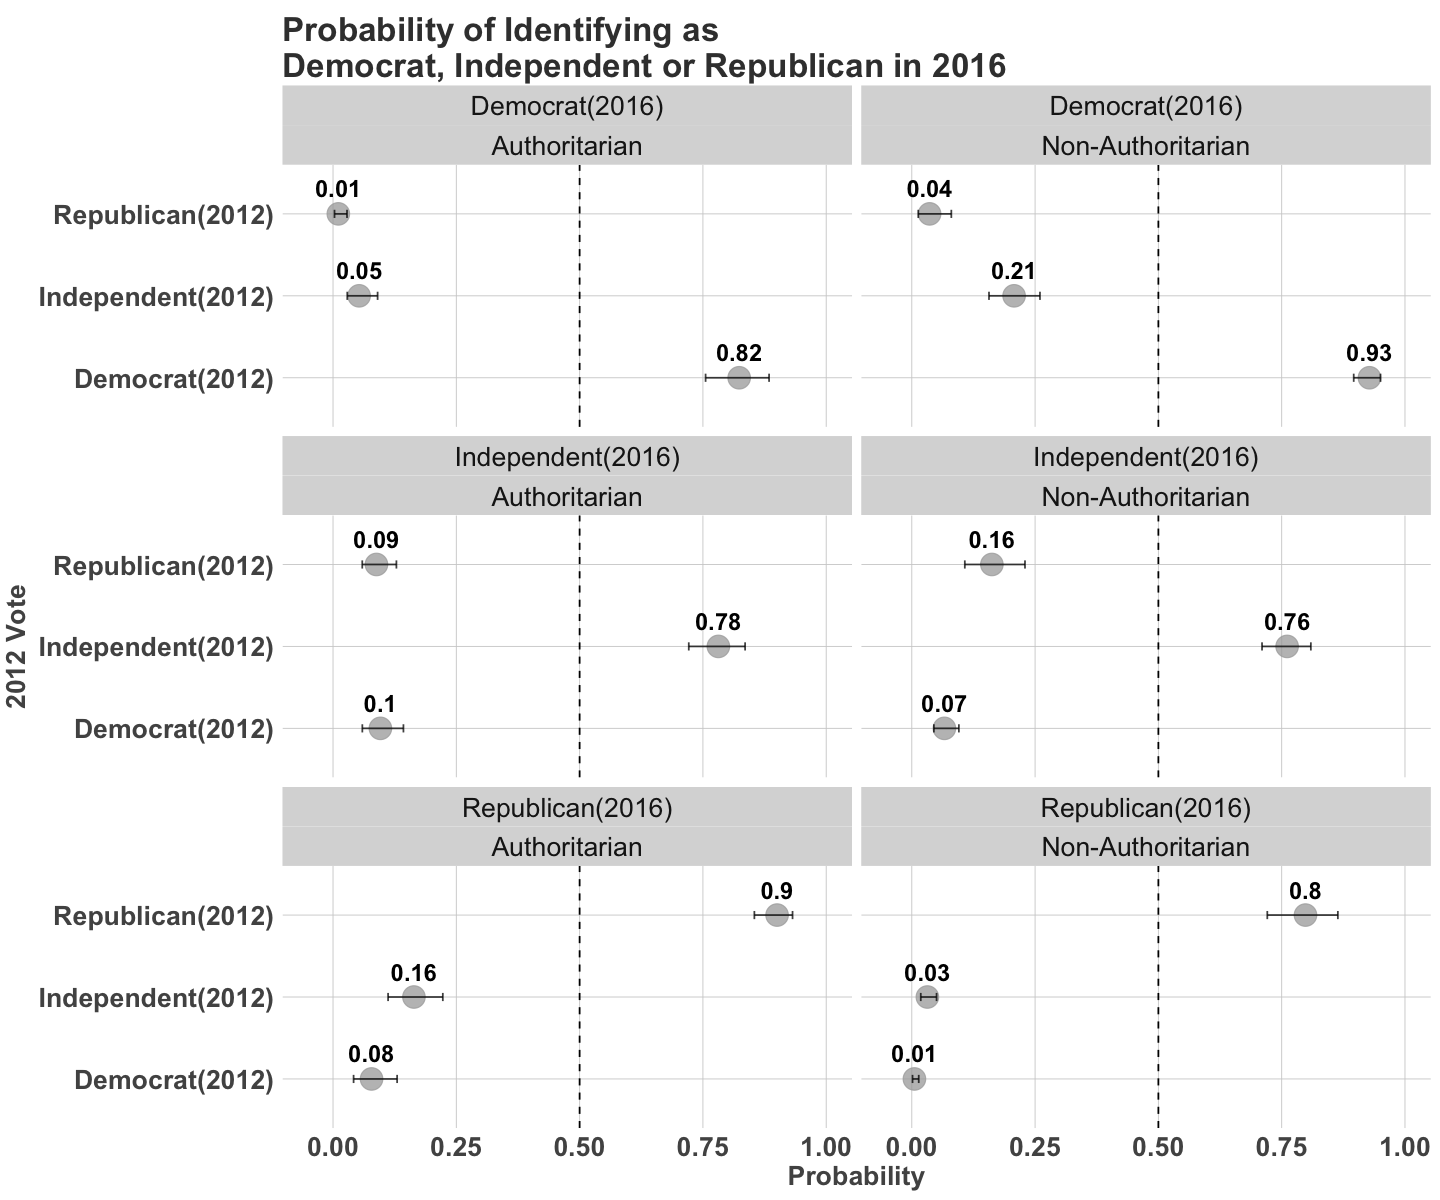

In [250]:
options(repr.plot.width=12, repr.plot.height=10)
#############################################################################################################################
zap_labels(dat2012) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(sex.2012 = mean(sex.2012, na.rm = T), age.2012 = mean(age.2012, na.rm = T), 
                       college.2012 = c(0,1), 
                       income.2012 = mean(income.2012, na.rm = T), 
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       republican = c(0,1),
                       independent =c(0,1)) %>% 
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_epred_draws(dat[[2]]) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                       mutate(outcome = recode(.category, `1` = "Democrat(2016)", `2` = "Independent(2016)", `3` = "Republican(2016)")) %>%
                       mutate(Partisanship = ifelse(republican == 0 & independent ==0, "Democrat(2012)", 
                                                ifelse(republican ==1 & independent ==0, "Republican(2012)",
                                                    "Independent(2012)")))  %>%
                      filter(!(republican ==1 & independent ==1)) %>% 

                       group_by(outcome, Authoritarianism, Partisanship) %>% 
                      summarize(mean = quantile(.epred, prob =  0.5),
                                min  = quantile(.epred, prob = 0.025),
                                max  = quantile(.epred, prob = 0.975)) %>% 
                                
ggplot(
              aes(x = Partisanship, 
                  y = mean, ymin=max, 
                  ymax=min, 
                  label = round(mean,2)))+
  facet_wrap(~as.factor(outcome) + as.factor(Authoritarianism), nrow = 3) +
  geom_point(size=6, colour = "darkgrey", alpha = 0.75) +
  geom_errorbar(width = 0.10, alpha=0.75, colour = "black") +
  ggtitle("Probability of Identifying as\nDemocrat, Independent or Republican in 2016") +
  ggtheme + 
  scale_y_continuous("Probability", limits=c(-0.05,1))+
  scale_x_discrete("2012 Vote") + 
  geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed") + 
  geom_text(aes(fontface = 2), vjust = -1, size = 5)+
  coord_flip()

### 2012-2016 Panel

`summarise()` has grouped output by 'outcome', 'Authoritarianism'. You can
override using the `.groups` argument.


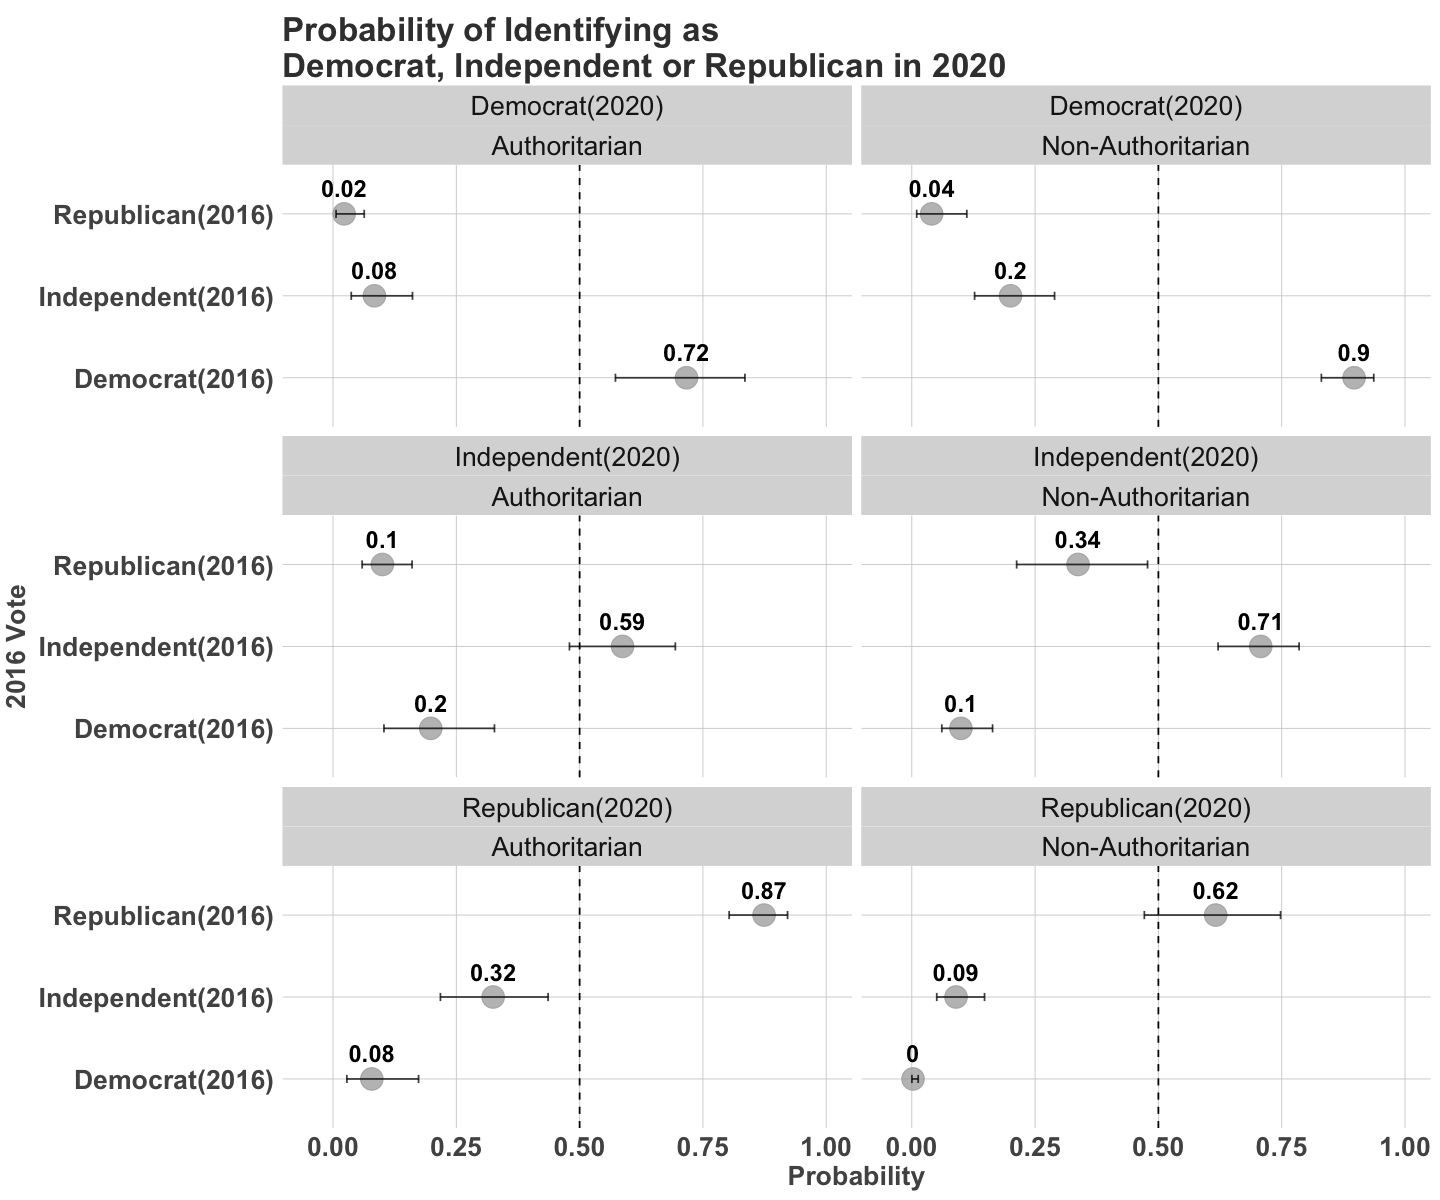

In [251]:
options(repr.plot.width=12, repr.plot.height=10)
#############################################################################################################################
zap_labels(dat2016) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(female.2016 = mean(female.2016, na.rm = T), age.2016 = mean(age.2016, na.rm = T), 
                       college.2016 = c(0,1), income.2016 = mean(income.2016, na.rm = T), 
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       republican = c(0,1),
                       independent =c(0,1)) %>% 
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_epred_draws(dat[[3]]) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                       mutate(outcome = recode(.category, `1` = "Democrat(2020)", `2` = "Independent(2020)", `3` = "Republican(2020)")) %>%
                       mutate(Partisanship = ifelse(republican == 0 & independent ==0, "Democrat(2016)", 
                                                ifelse(republican ==1 & independent ==0, "Republican(2016)",
                                                    "Independent(2016)")))  %>%
                      filter(!(republican ==1 & independent ==1)) %>% 
                       group_by(outcome, Authoritarianism, Partisanship) %>% 
                      summarize(mean = quantile(.epred, prob =  0.5),
                                min  = quantile(.epred, prob = 0.025),
                                max  = quantile(.epred, prob = 0.975)) %>% 
                                
ggplot(
              aes(x = Partisanship, 
                  y = mean, ymin=max, 
                  ymax=min, 
                  label = round(mean,2)))+
  facet_wrap(~as.factor(outcome) + as.factor(Authoritarianism), nrow = 3) +
  geom_point(size=6, colour = "darkgrey", alpha = 0.75) +
  geom_errorbar(width = 0.10, alpha=0.75, colour = "black") +
  ggtitle("Probability of Identifying as\nDemocrat, Independent or Republican in 2020") +
  ggtheme + 
  scale_y_continuous("Probability", limits=c(-0.05,1))+
  scale_x_discrete("2016 Vote") + 
  geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed") + 
  geom_text(aes(fontface = 2), vjust = -1, size = 5)+
  coord_flip()